# Predicting digits using MNIST dataset 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm.notebook import tqdm

Uploading the dataset

In [2]:
from torchvision import datasets, transforms

mnist_train = datasets.MNIST(root = "./week2", transform = transforms.ToTensor(), train = True, download = True)
mnist_test = datasets.MNIST(root = "./week2", transform = transforms.ToTensor(), train = False, download = True)

In [3]:
print(f"Number of data points in the train set: {len(mnist_train)}")
print(f"Number of data points in the test set: {len(mnist_test)}")

Number of data points in the train set: 60000
Number of data points in the test set: 10000


Let's see the fourth image in the train dataset:

The image shape is: torch.Size([1, 28, 28])
The image is:
The label is: 1


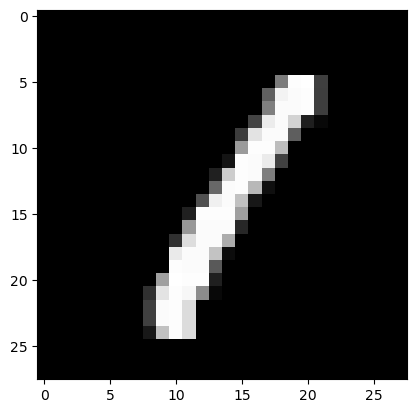

In [4]:
image, label = mnist_train[3]
print(f"The image shape is: {image.shape}")
image = image.reshape([28,28])
print("The image is:")
plt.imshow(image, cmap = "gray")

print(f"The label is: {label}")

Making the size of the batch and using it shuffling the training data:t

In [5]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size = 100, shuffle = True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size = 100, shuffle = False)

Minibatch from a DataLoader:

In [6]:
data_train_iter = iter(train_loader)
image, label = next(data_train_iter)

print(f"Minibatch for the images: \n{image}")
print(f"Minibatch for the labels: \n{label}")

Minibatch for the images: 
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
    

Seeing the index 0 from the batch:

This corresponds to the label: 9


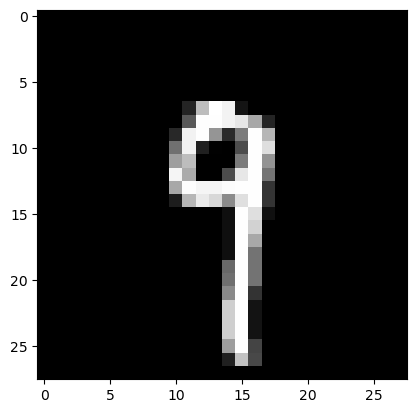

In [7]:
image_0 = image[0].reshape([28,28])
plt.imshow(image_0, cmap = "gray")
print(f"This corresponds to the label: {label[0]}")

## Logistic Regression model

Flattening the data inputs:

In [8]:
x = image.view(-1, 28*28)
print(f"Shape of the data inputs: {x.shape}")

Shape of the data inputs: torch.Size([100, 784])


W is going to be our vector of parameters, and b our vector of bias. Let's initialize W in a random form and fill B with zeros:

In [9]:
W = torch.randn(784, 10)/np.sqrt(784)
W.requires_grad_()

b = torch.zeros(10, requires_grad=True)

Computing y = XW + b, we have:

In [10]:
y = torch.matmul(x, W) + b

In [11]:
y[0, :]

tensor([-0.1172,  0.0282, -0.3676, -0.1759,  0.0021,  0.0751, -0.0742, -0.3111,
         0.2589, -0.0861], grad_fn=<SliceBackward0>)

Normalizing the y:

In [12]:
py = torch.nn.functional.softmax(y, dim = 1)
py[0, :]

tensor([0.0946, 0.1094, 0.0736, 0.0892, 0.1066, 0.1146, 0.0987, 0.0779, 0.1378,
        0.0976], grad_fn=<SliceBackward0>)

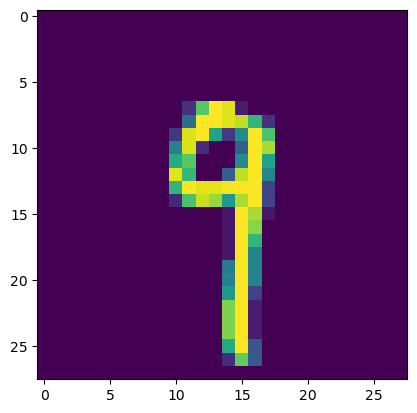

In [13]:
plt.imshow(x[0].reshape([28,28]))

The prediction is not good because W and b are filled with random numbers. Now, we have to train our model to obtain better parameters

Implementing the loss function (here, the cross-entropy loss):

In [14]:
cross_entropy_loss = torch.nn.functional.cross_entropy(y, label)

Now, to train the model, we are going to use backpropagation, that is, updating our parameters using stochastic gradient descent (SGD). Let's go!

In [15]:
optimizer = torch.optim.SGD([W,b], lr = 0.1)

In [16]:
cross_entropy_loss.backward()

In [17]:
b.grad

tensor([ 0.0177, -0.0264,  0.0475, -0.0115,  0.0332,  0.0218,  0.0128, -0.0964,
         0.0690, -0.0676])

In [18]:
optimizer.step()

In [19]:
optimizer.zero_grad()

In [20]:
b.grad

Training the model for other minibatchs:

In [21]:
for images, labels in tqdm(train_loader):
    # Zero out the gradients
    optimizer.zero_grad()
    
    # Forward pass
    x = images.view(-1, 28*28)
    y = torch.matmul(x, W) + b
    cross_entropy_loss = torch.nn.functional.cross_entropy(y, labels)
    
    # Backward pass
    cross_entropy_loss.backward()
    optimizer.step()

  0%|          | 0/600 [00:00<?, ?it/s]

Testing the model:

In [22]:
correct = 0
total = len(mnist_test)

with torch.no_grad():
    # Iterate through test set minibatchs 
    for images, labels in tqdm(test_loader):
        # Forward pass
        x = images.view(-1, 28*28)
        y = torch.matmul(x, W) + b
        
        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == labels).float())
    
print('Test accuracy: {}'.format(correct/total))

  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy: 0.902899980545044


Plotting the weights:

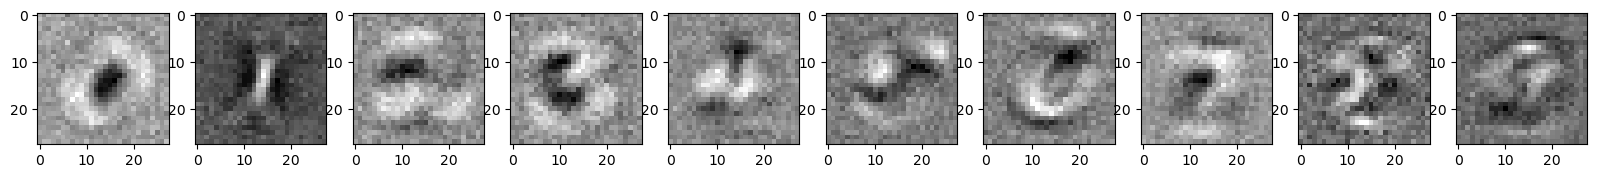

In [23]:
fig, ax = plt.subplots(1, 10, figsize=(20, 2))

for digit in range(10):
    ax[digit].imshow(W[:,digit].detach().view(28,28), cmap='gray')

The full code is:

In [24]:
import numpy as np
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
from tqdm.notebook import tqdm

# Load the data
mnist_train = datasets.MNIST(root="./week2_fc", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./week2_fc", train=False, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

## Training
# Initialize parameters
W = torch.randn(784, 10)/np.sqrt(784)
W.requires_grad_()
b = torch.zeros(10, requires_grad=True)

# Optimizer
optimizer = torch.optim.SGD([W,b], lr=0.1)

# Iterate through train set minibatchs 
for images, labels in tqdm(train_loader):
    # Zero out the gradients
    optimizer.zero_grad()
    
    # Forward pass
    x = images.view(-1, 28*28)
    y = torch.matmul(x, W) + b
    cross_entropy = F.cross_entropy(y, labels)
    # Backward pass
    cross_entropy.backward()
    optimizer.step()

## Testing
correct = 0
total = len(mnist_test)

with torch.no_grad():
    # Iterate through test set minibatchs 
    for images, labels in tqdm(test_loader):
        # Forward pass
        x = images.view(-1, 28*28)
        y = torch.matmul(x, W) + b
        
        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == labels).float())
    
print('Test accuracy: {}'.format(correct/total))

100%|█████████████████████████████| 9912422/9912422 [00:30<00:00, 323602.48it/s]


Extracting ./week2_fc/MNIST/raw/train-images-idx3-ubyte.gz to ./week2_fc/MNIST/raw



100%|████████████████████████████████| 28881/28881 [00:00<00:00, 1133422.79it/s]


Extracting ./week2_fc/MNIST/raw/train-labels-idx1-ubyte.gz to ./week2_fc/MNIST/raw



100%|████████████████████████████| 1648877/1648877 [00:01<00:00, 1212924.87it/s]


Extracting ./week2_fc/MNIST/raw/t10k-images-idx3-ubyte.gz to ./week2_fc/MNIST/raw



100%|███████████████████████████████████| 4542/4542 [00:00<00:00, 749371.76it/s]

Extracting ./week2_fc/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./week2_fc/MNIST/raw



  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy: 0.9013000130653381
